# Zomato Restaurant Data Analytics: Customer Behavior Analysis

- Understanding customer preferences and restaurant trends helps food businesses make better decisions.
- In this notebook, we analyze the Zomato restaurant dataset using Python to extract useful insights.

### Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Zomato-data.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Data Cleaning and Preparation

In [3]:
def handleRate(value):
    try:
        return float(str(value).split('/')[0])
    except(ValueError, TypeError):
        return None

In [4]:
df['rate'] = df['rate'].apply(handleRate)

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Exploring Restaurant Types
let's see the popular restaurant categories

Text(0.5, 0, 'Type of Restaurant')

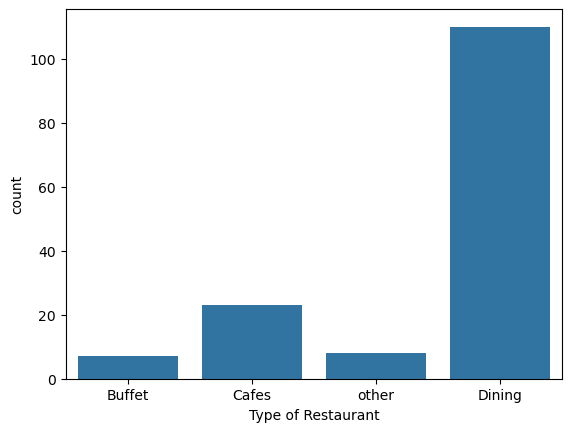

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

### Insights
Majority of the restaurants are comes under the dinner category

### Votes by Restaurant types

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data    

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [10]:
res_votes = pd.DataFrame(grouped_data)
res_votes

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

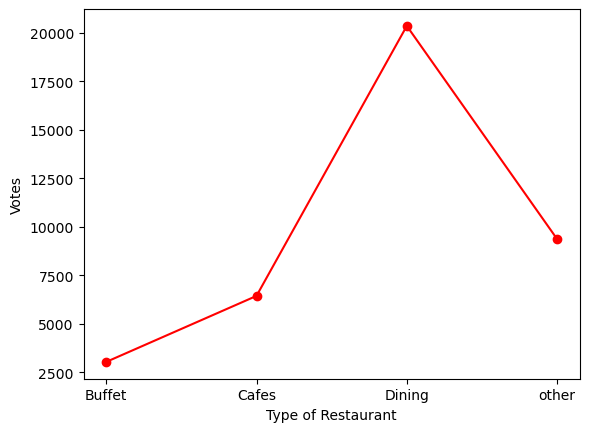

In [11]:
plt.plot(res_votes, c='red', marker='o')
plt.xlabel('Type of Restaurant')
plt.ylabel('Votes')

### Insights
Dining restaurants are more voted or liked by customers

In [12]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


### Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

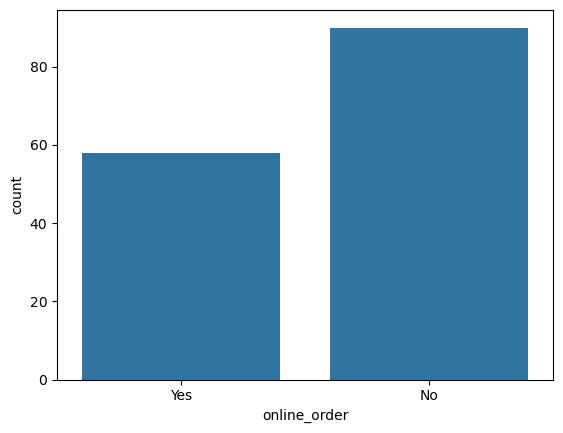

In [13]:
sns.countplot(x=df['online_order'])

### Insights
Majority of the restaurants do not accept online orders.

### Analyze Ratings

In [14]:
count, bin_edges = np.histogram(df['rate'])

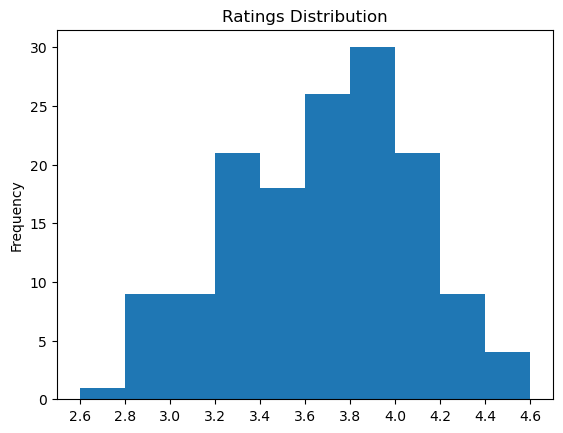

In [15]:
df['rate'].plot(kind='hist', xticks=bin_edges)
plt.title('Ratings Distribution')
plt.show()


### Insights
The majority of restaurants received ratings ranging from 3.5 to 4

### Approximate Cost for couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

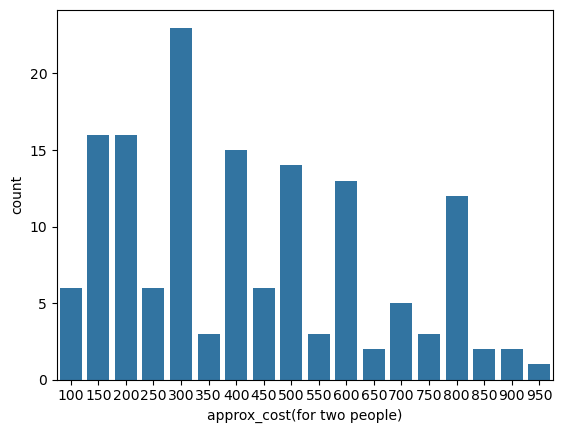

In [16]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Insight
The majority of couples prefer restaurants with approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

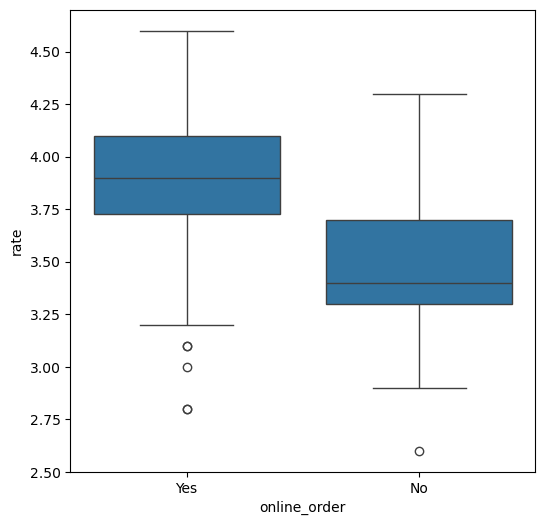

In [17]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

### Insights
Offline orders received lower ratings in comparison to online orders which obtained excellent ratings

### Order mode preferences based on Restaurant type

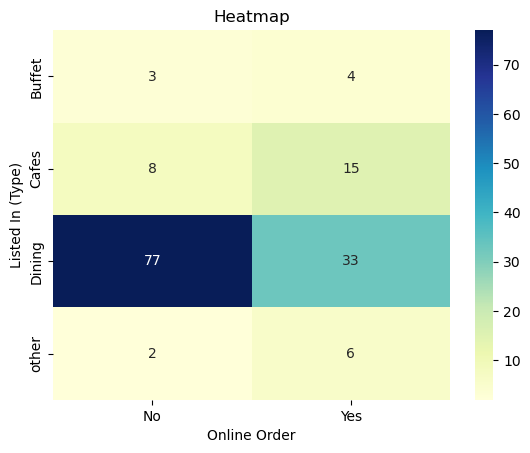

In [18]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

### Insights
- Dining restaurants mainly receive offline orders.
- Cafes receive more online orders.
- Customers prefer in-person dining at restaurants and online ordering for cafes.

### Final Conclusion

- Dining restaurants dominate the market.

- Online delivery is less common overall but popular among cafes.

- Mid-range pricing (300 rupees for two) is preferred by couples.

- Online-order restaurants tend to receive higher ratings.